# Homework 2 helper functions

This notebook contains a range of helper functions that will be useful in completing exercise 1 of homework 2.  Read through the examples carefully - and afterwards either throw them into a simple library, or copy and paste relevant chunks for re-use.

In [1]:
# import autograd wrapped numpy
import autograd.numpy as np

# import path to datasets
datapath = 'datasets/'

# this is needed to compensate for %matplotl+ib notebook's tendancy to blow up images when plotted inline
from matplotlib import rcParams
rcParams['figure.autolayout'] = True
%matplotlib notebook

# autoreload function - so if anything behind the scenes is changeed those changes
# are reflected in the notebook without having to restart the kernel
%load_ext autoreload
%autoreload 2

# A simple zero-order optimization algo

Below is a `Python` implementation of a simple *zero-order* optimization method called *coordinate descent*.  I've also seen it called the 'twiddle algorithm' - which I think is a stupid name.  If you like you can see [my set of notes](https://jermwatt.github.io/machine_learning_refined/notes/2_Zero_order_methods/2_6_Coordinate.html) describing this method.

Zero order optimmization methods (also called *derivative free* methods) are really quite simple - but for certain applications they are very effective.  The basic gist: instead of using *first order information* ala gradient descent at each step, we literally try out a set of weights near our current step, plug them into the cost function, and choose the one that *decreases* the cost the most.  The particular algorithm below just searches along the *coordinate axes* at each step (thats how it beats the *curse of dimensionality*).

In any case, the inputs of this function are as follows:

- `g` : an input function to minimize
- `w_init` : an initialization for the optimization process
- `alpha` : steplength / learning rate
- `max_its` : a maximum number of iterations to run
- `verbose` : set to 'True" to print the result of each step of gradient descent

And the outputs:

- `w_hist` : a history of each set of weights from the a run of gradient descent
- `train_hist` : a corresponding cost function history

In [2]:
import autograd.numpy as np
from autograd.misc.flatten import flatten_func

# zero order coordinate search
def coordinate_descent(g,w_init,alpha,max_its,verbose): 
    # flatten the input function
    g_flat, unflatten, w = flatten_func(g, w_init)

    # record history
    w_hist = [unflatten(w)]
    cost_eval = g_flat(w)
    train_hist = [cost_eval]

    # start loop
    N = np.size(w)
    for k in range(1,max_its+1):              
        # random shuffle of coordinates
        c = np.random.permutation(N)

        # forming the direction matrix out of the loop
        train_cost = train_hist[-1]

        # loop over each coordinate direction
        for n in range(N):
            direction = np.zeros((N,1)).flatten()
            direction[c[n]] = 1

            # evaluate all candidates
            evals =  [g_flat(w + alpha*direction)]
            evals.append(g_flat(w - alpha*direction))
            evals = np.array(evals)

            # if we find a real descent direction take the step in its direction
            ind = np.argmin(evals)
            if evals[ind] < train_cost:
                # take step
                w = w + ((-1)**(ind))*alpha*direction
                train_cost = evals[ind]

        # record weight update, train and val costs
        w_hist.append(unflatten(w))
        train_hist.append(train_cost)

        # print update
        if verbose == True:
            print ('step ' + str(k+1) + ' complete, train cost = ' + str(np.round(train_hist[-1],4)[0]))

    # print update and return
    if verbose == True:
        print ('finished all ' + str(max_its) + ' steps')
    return w_hist,train_hist

A simple demonstration using a toy function - a simple $10$ dimensional quadratic centered at the origin.

In [5]:
# a simple toy function
g = lambda w: np.dot(w.T,w)

# run gradient descent algo above to minimize toy function
w_init = 0.1*np.random.randn(10,1)
max_its = 100
alpha = 10**(-2)
w_hist,train_hist = coordinate_descent(g,w_init,alpha,max_its,verbose=True)

step 2 complete, train cost = 0.1366
step 3 complete, train cost = 0.1175
step 4 complete, train cost = 0.1003
step 5 complete, train cost = 0.0848
step 6 complete, train cost = 0.0712
step 7 complete, train cost = 0.0592
step 8 complete, train cost = 0.0487
step 9 complete, train cost = 0.0399
step 10 complete, train cost = 0.0324
step 11 complete, train cost = 0.026
step 12 complete, train cost = 0.0206
step 13 complete, train cost = 0.0159
step 14 complete, train cost = 0.0121
step 15 complete, train cost = 0.009
step 16 complete, train cost = 0.0065
step 17 complete, train cost = 0.0045
step 18 complete, train cost = 0.0028
step 19 complete, train cost = 0.0016
step 20 complete, train cost = 0.0008
step 21 complete, train cost = 0.0004
step 22 complete, train cost = 0.0001
step 23 complete, train cost = 0.0001
step 24 complete, train cost = 0.0001
step 25 complete, train cost = 0.0001
step 26 complete, train cost = 0.0001
step 27 complete, train cost = 0.0001
step 28 complete, trai

Print out the best weights from this run.  Note the global minimum here is at the origin where the cost function takes on zero value.  We get quite close.

In [6]:
### determine and show the best set of weights / cost evaluation from this run
# index of the minimum cost value attained
ind = np.argmin(train_hist)

# corresponding weights and cost evaluation
w_best = w_hist[ind]
g_best = train_hist[ind]
print('======== best set of weights ========')
print(w_best)
print('======== best associated cost val ========')
print(g_best)

======== best set of weights ========
[[ 0.00493771]
 [ 0.00419128]
 [ 0.00324805]
 [ 0.00178891]
 [-0.0038823 ]
 [ 0.00187136]
 [ 0.00307746]
 [ 0.00084684]
 [ 0.00359387]
 [-0.00154483]]
======== best associated cost val ========
[9.97623488e-05]


Here is a small function to print out a picture of the cost function history.

In [7]:
import matplotlib.pyplot as plt
def plot_cost_function_history(cost_history):
    figure = plt.figure(figsize = (10,3))
    plt.plot(cost_history)
    plt.xlabel('iteration')
    plt.ylabel('cost value',rotation = 90)
    plt.show()

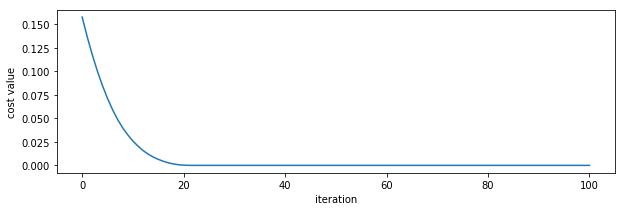

In [8]:
# print out that cost function history plot
plot_cost_function_history(train_hist)